# Improving an LLM Agent Routine Using Meta-Prompting 

This notebook systematically **improves** an LLM Agent routine through an iterative, test-driven approach. By continuously refining the routine based on previous evaluations and the initial policy, we enhance the agent’s **accuracy, reasoning, and execution capabilities**.  

## Improvement Framework

To optimize the agent’s **decision-making and compliance**, we establish a structured loop where:  

1. **Initial Routine and Evaluation**  
   - The process begins with a **predefined policy** and an initial set of test cases.  
   - The routine is evaluated to assess the agent’s **interpretation, function execution, and accuracy**.  

2. **Iterative Routine Refinement**  
   - Based on the **previous evaluation results**, the routine is **regenerated** using meta-prompting.  
   - The updated routine incorporates insights from past failures to enhance performance.  

3. **Dual LLM Simulation**  
   - **User Simulator**: Simulates real-world user interactions based on structured test cases.  
   - **Agent Simulator**: The LLM agent follows the refined routine, processing user requests dynamically.  

4. **Conversational Interaction and Re-Evaluation**  
   - The **User Simulator** presents test queries.  
   - The **Agent Simulator** applies the improved routine to interpret requests and execute the correct function.  
   - The performance is **measured**, ensuring the agent correctly follows the refined routine.  

5. **Stopping Criteria**  
   - The loop continues **until the maximum iteration limit is reached** or **100% accuracy** is achieved.  

## Objectives  

- **Incrementally enhance the agent’s routine** by leveraging evaluation-driven refinements.  
- **Improve Execution Accuracy** by iterating on test failures and optimizing function calls.  
- **Ensure Maximum Compliance** by aligning the routine with structured reasoning and decision-making principles.  

<div align="center">
  <img src="images/improve_ai.png" alt="Meta-prompting Improve" width="800">
</div>

## Getting Started

Prerequisites:

- Python 3.11 or 3.12 installed on your system.
- LLM Agentic Tool Mesh library installed. If not, install it using: `pip install 'llmesh[all]'`
- Install kernel for Jupiter notebook `pip install ipykernel`
- Create `.env` file inside `notebooks/data` folder with the value of `PYTHONPATH` and `OPENAI_API_KEY` environment variables

In [1]:
from dotenv import load_dotenv
import os

# Load environment variables from the .env file located in the Data folder
dotenv_path = os.path.join('data', '.env')
load_dotenv(dotenv_path)

# Read environment variables
python_path = os.getenv('PYTHONPATH')
if not python_path:
    raise ValueError("Project path is not set.")
llm_api_key = os.getenv('OPENAI_API_KEY')
if not llm_api_key:
    raise ValueError("API key is not set in environment variables.")

# Change working directory
os.chdir(python_path)

## Loading the System Prompt for Meta-Prompting

The system prompt is loaded from a predefined prompt file and enriched by appending the tool descriptions to ensure seamless integration with the LLM Agent's capabilities.  

In [2]:
import json
from IPython.display import Markdown
from notebooks.utils import load_prompt, TOOLS, TOOL_CLOSE
from notebooks.utils import read_policy

policy = read_policy()
tools = f"\n\n```json\n{json.dumps(TOOLS, indent=4)}\n```"
system_prompt = load_prompt('routine_improvment', {'policy': policy, 'tools':tools, 'tool_close': TOOL_CLOSE})
display(Markdown(system_prompt))

2025-02-19 18:33:45,501 - ATHON - DEBUG - Prompt generated from notebooks/prompts//routine_improvment.txt with params {'policy': '# **Private 5G Network Management Policy**\n\n**Purpose**: This document serves as a detailed guide for internal network administrators and support teams to manage a private 5G network, namely HPE 5G Core. The focus is on ensuring efficient operations, maintaining security, optimizing performance, and handling user requests effectively.\n\n**Note**: Always follow best practices in cybersecurity, compliance, and performance optimization while managing the private 5G network.\n\n## **Table of Contents**\n\n1. General Guidelines for Network Management\n2. Access Control and User Management\n3. Network Configuration and Optimization\n4. FAQs for Common Scenarios\n\n### **1. General Guidelines for Network Management**\n\n* **Monitor Network Performance**: Continuously track key performance indicators (KPIs) such as latency, bandwidth usage, and signal strength wi

# Instructions
You are an agent that is responsible for improving the quality of instructions that are provided to a customer service LLM agent. 
Your task is to improve the instructions that are provided to the LLM agent in order to increase accuracy on a test set while adhering to the initial policy. 

## Criteria
- Analyze the existing instructions and the results of the eval. Understand which behaviors lead to failures.
- For example, if the LLM agent is not asking for a data when it is needed, you should add a step to ask for this data.
- Improve the instructions to address the gaps in the eval results.
- Ensure changes made are compliant with the original policy.
- Only use the tools provided.
- End with a final action for case resolution: calling the `close_case` function should always be the final step.
- Use the functions provided to the best of your ability to ensure the LLM agent can handle the customer service requests effectively. Including gathering data where necessary.
- Try changing the format if this formatting doesn't work well - consider basic XML (e.g. <step> <substep> <if> <case>) or markdown as alternatives.

You will be provided with 4 items:
1) The ground-truth policy for the customer service agent containing detailed instructions on how to handle P5G networks.
2) Full list of available functions.
3) A routine instruction set.
4) A results that shows the LLMs performance on a test set using this routine instruction set. This dataset contains columns showing:
    - Request: This is the initial user request. 
    - Expected Function: This is the function we expect the LLM to call at the end of the conversation. 
    - Expected Input: This is the input we expect the LLM to provide to the function at the end of the conversation.
    - Actual Function: This is the final function the LLM called using the current instructions.
    - Actual Input: These are the function parameters the LLM provided based on the current instructions.
    - Transcripts: This is the conversation transcript between the user and the LLM agent. 
    - Is Correct: True/False value depending on if the model responded correctly
5) A summary of previous iterations, detailing:
   - Changes made in each iteration.
   - The rationale behind those changes.
   - The impact of those changes (e.g., improvement or decline in accuracy).

# Conclusion
Return the improved routine exactly as written within the defined JSON. Remove all parts from the LLM's answer that are not part of the policy, and do not create additional keys.

# Data

## 1. Original policy
# **Private 5G Network Management Policy**

**Purpose**: This document serves as a detailed guide for internal network administrators and support teams to manage a private 5G network, namely HPE 5G Core. The focus is on ensuring efficient operations, maintaining security, optimizing performance, and handling user requests effectively.

**Note**: Always follow best practices in cybersecurity, compliance, and performance optimization while managing the private 5G network.

## **Table of Contents**

1. General Guidelines for Network Management
2. Access Control and User Management
3. Network Configuration and Optimization
4. FAQs for Common Scenarios

### **1. General Guidelines for Network Management**

* **Monitor Network Performance**: Continuously track key performance indicators (KPIs) such as latency, bandwidth usage, and signal strength within the HPE 5G Core.
* **Monitor AMF-NGAP Status**: Retrieve the current status of the N2 interface between the gNB and the AMF within the HPE 5G Core.
* **Retrieve Logs from Network Functions**: Obtain logs for a specific network function within the HPE 5G Core.
* **Read Network Function Profile**: Access the profile of a specific network function within the HPE 5G Core.

### **2. Access Control and User Management**

#### **2.1 Device Management**

* **Approved Device List**: List of authorized devices/users/UEs, defined by the 'imsi-', permitted to access the HPE 5G Core.
* **Device Information**: Details of authorized device/user/UE within the HPE 5G Core. If a user/device/UE doesn't start with "imsi-", use the request details to refer to the approved device list and find the corresponding entry.
* **Approved Data Profiles**: List of authorized data profiles, defined by the uuid, within the HPE 5G Core.
* **Data Profile Information**: Details of a specific data profile within the HPE 5G Core. If the specified data profile does not exist, use the available information in the request to locate it in the approved data profiles list.
* **Retrieve UE Location Information**: Obtain the location of a target UE within the HPE 5G Core.

### **3. Network Configuration and Optimization**

* **Assign New User Data Profile**: Allocate a dedicated network data profile for different use cases. The profile must be from the authorized list, and the user must be on the approved device/user/UE list. If the user/device/UE doesn’t start with "imsi-", use the request details to find it in the approved device list. If the data profile doesn’t exist, use the request details to find it in the approved data profiles list.

### **4. FAQs for Common Scenarios**

**Q1: How do I retrieve the list of authorized users?**

* **Policy**: Submit a device list request to retrieve the authorized list of devices/users/UEs within the HPE 5G Core, which relies on UDM.

**Q2: How do I retrieve the list of data profiles?**

* **Policy**: Submit a device list request to retrieve the authorized list of data profiles within the HPE 5G Core, which relies on UDM.

**Q3: How do I assign a new data profile to a user?**

* **Policy**: Submit a data profile assignment request. The profile must belong to the authorized list of data profiles as well as the user must be in the authorized list of devices/users/UEs.

**Q4: How do I retrieve information for a specific user?**

* **Policy**: Submit a device information request. The user must be in the authorized list of devices/users/UEs.

**Q5: How do I retrieve information about the NGAP status?**

* **Policy**: Submit a Monitor AMF-NGAP Status request to obtain the current status of the N2 interface between the gNB and the AMF.

**Q6: How do I monitor network performance?**

* **Policy**: Submit a Monitor Network Performance request to track key performance indicators (KPIs).

**Q7: How do I obtain logs for a specific network function?**

* **Policy**: Submit a Retrieve Logs from NF request, specifying the network function for which logs are required.

**Q8: How do I retrieve a user's location information?**

* **Policy**: Submit a Retrieve UE Location Information request, specifying the target user.

**Q9: How do I retrieve the profile of a specific network function?**

* **Policy**: Submit a Read Network Function Profile request, specifying the network function instance to retrieve its profile.

**Q10: How do I retrieve information for a specific data profile?**

* **Policy**: Submit a Data Profile Information request, specifying the data profile instance to retrieve its profile.


## 2. Functions


```json
[
    {
        "name": "get_amf_ngap_status",
        "description": "Retrieve AMF-NGAP status from N2 interface.",
        "parameters": {
            "nf": {
                "description": "Network function name where take the AMF-NGAP status from N2 interface.",
                "type": "string",
                "required": true
            }
        }
    },
    {
        "name": "patch_provisioned_data_profile",
        "description": "Allocate a dedicated network data profile for different use cases(e.g., IoT, enterprise applications, emergency services). The assigned data profile must belong to the authorized list of available profiles,the user must be on the authorized list of devices/users.",
        "parameters": {
            "nf": {
                "description": "The name of network function where take the profiles.",
                "type": "string",
                "required": true
            },
            "supi": {
                "description": "The id which specify the supi starting with 'imsi-'.",
                "type": "string",
                "required": true
            },
            "uuid": {
                "description": "The id which specify the data profile.",
                "type": "string",
                "required": true
            }
        }
    },
    {
        "name": "get_dataprofiles",
        "description": "Get List of authorized data profiles within the HPE 5G Core.",
        "parameters": {
            "nf": {
                "description": "The name of network function where take list of authorized data profiles.",
                "type": "string",
                "required": true
            }
        }
    },
    {
        "name": "get_logs",
        "description": "Retrieve network function logs.",
        "parameters": {
            "nf": {
                "description": "The name of network function where take the logs.",
                "type": "string",
                "required": true
            }
        }
    },
    {
        "name": "get_supi_location",
        "description": "Obtain the location of a target UE within the HPE 5G Core.",
        "parameters": {
            "nf": {
                "description": "The name of network function where take the supi location.",
                "type": "string",
                "required": true
            },
            "supi": {
                "description": "The id which specify the supi starting with 'imsi-'.",
                "type": "string",
                "required": true
            },
            "pdu_session_id": {
                "description": "The id which specify the PDU Session ID.",
                "type": "string",
                "required": true
            }
        }
    },
    {
        "name": "get_dataprofile",
        "description": "Get a specific and authorized data profiles within the HPE 5G Core.",
        "parameters": {
            "nf": {
                "description": "The name of network function where take the specific data profile.",
                "type": "string",
                "required": true
            },
            "uuid": {
                "description": "The id which specify the data profile.",
                "type": "string",
                "required": true
            }
        }
    },
    {
        "name": "get_supi",
        "description": "Get specific user/device permitted to access the HPE 5G Core.",
        "parameters": {
            "nf": {
                "description": "The name of network function where take the specific supi.",
                "type": "string",
                "required": true
            },
            "supi": {
                "description": "The id which specify the supi starting with 'imsi-'.",
                "type": "string",
                "required": true
            }
        }
    },
    {
        "name": "get_supis",
        "description": "Get List of authorized devices/users permitted to access the HPE 5G Core.",
        "parameters": {
            "nf": {
                "description": "The name of network function where take list of supis (authorized devices).",
                "type": "string",
                "required": true
            }
        }
    },
    {
        "name": "get_network_performance",
        "description": "Retrieve a specific network performance metric.",
        "parameters": {
            "nf": {
                "description": "The name of network function to be measured",
                "type": "string",
                "required": true
            },
            "metric": {
                "description": "The metric to be measured",
                "type": "string",
                "required": true
            }
        }
    },
    {
        "name": "get_nf_profile",
        "description": "Access the profile status of a specific network function within the HPE 5G Core.",
        "parameters": {
            "nf": {
                "description": "The name of network function to be used to retrieve the profile",
                "type": "string",
                "required": true
            },
            "target_nf": {
                "description": "The name of network function of the profile",
                "type": "string",
                "required": true
            }
        }
    },
    {
        "name": "close_case",
        "description": "Tool to close a case.",
        "parameters": {
            "nf": {
                "description": "The name of network function to be used to retrieve the profile",
                "type": "string",
                "required": true
            }
        }
    }
]
```

## Loading the Routine

The generated routine is loaded to define the structured operational workflow for the LLM Agent, ensuring alignment with policies, optimized tool usage, and consistent decision-making.  

In [3]:
from notebooks.utils import get_routine

routine = get_routine()

2025-02-19 18:33:45,508 - ATHON - INFO - Data loaded from notebooks/files/p5g_routine_0_cached.pkl.


## Loading the Test Dataframe

The test dataframe is loaded to evaluate the LLM Agent's performance and ensure its responses align with the expected outcomes.  

In [4]:
from notebooks.utils import read_test_dataframe

test_dataframe = read_test_dataframe()
display(test_dataframe)

,Context,Request,Network Function,Profile Network Function,SUPI,UUID,PDU Session ID,Metric,Expected Function,Expected Inputs
0,I want to get the status of the N2 interface b...,Get the status of the N2 interface between AMF...,amf,NaN,NaN,NaN,NaN,NaN,get_amf_ngap_status,"{""nf"": ""amf""}"
1,I need to check the status of the interface be...,What is the status of the interface between AM...,amf,NaN,NaN,NaN,NaN,NaN,get_amf_ngap_status,"{""nf"": ""amf""}"
2,I want to verify the status of the interface b...,Check the interface status between AMF and NGAP,amf,NaN,NaN,NaN,NaN,NaN,get_amf_ngap_status,"{""nf"": ""amf""}"
3,I need to confirm the current status of the N2...,Retrieve the status of the N2 interface betwee...,amf,NaN,NaN,NaN,NaN,NaN,get_amf_ngap_status,"{""nf"": ""amf""}"
4,I want to monitor the status of the interface ...,Is the interface between AMF and NGAP active?,amf,NaN,NaN,NaN,NaN,NaN,get_amf_ngap_status,"{""nf"": ""amf""}"
5,Track latency within the HPE 5G Core,Measure the latency in the HPE 5G Core,kpi,NaN,NaN,NaN,NaN,latency,get_network_performance,"{""nf"": ""kpi"",""metric"": ""latency""}"
6,Monitor bandwidth usage within the HPE 5G Core,Check the current throughput in the HPE 5G Core,kpi,NaN,NaN,NaN,NaN,throughput,get_network_performance,"{""nf"": ""kpi"",""metric"": ""throughput""}"
7,Observe signal strength within the HPE 5G Core,Assess the signal strength in the HPE 5G Core,kpi,NaN,NaN,NaN,NaN,signal_strength,get_network_performance,"{""nf"": ""kpi"",""metric"": ""signal_strength""}"
8,Analyze latency in the HPE 5G Core,What is the current latency in the HPE 5G Core?,kpi,NaN,NaN,NaN,NaN,latency,get_network_performance,"{""nf"": ""kpi"",""metric"": ""latency""}"
9,Evaluate bandwidth usage in the HPE 5G Core,What is the current bandwidth usage in the HPE...,kpi,NaN,NaN,NaN,NaN,bandwidth,get_network_performance,"{""nf"": ""kpi"",""metric"": ""bandwidth""}"


## Loading the Result Dataframe

The result DataFrame is loaded to enhance the LLM Agent's performance. It facilitates regenerating the routine through meta-prompting by leveraging the existing routine and its outcomes.

In [5]:
from notebooks.utils import read_result_dataframe

result_dataframe = read_result_dataframe()

## Improving the Routine

The routine is iteratively refined to enhance performance. Starting from the initial policy and the results of the previous evaluation, we **regenerate the routine** through meta-prompting, incorporating insights from past iterations.  

For each cycle, we evaluate the updated routine by simulating interactions between the **Agent and the Customer**, assessing the Agent’s ability to interpret requests, apply reasoning, and execute the correct function with the appropriate inputs. This process repeats until we either reach the maximum number of iterations or achieve **100% accuracy**.

In [6]:
import pandas as pd
from notebooks.utils import (
    generate_improve_messages,
    is_lower_than_max_tokens,
    improve_routine,
    evaluate_test_case,
    write_result_dataframe,
    are_results_cached,
    MAX_IMPROVMENT_LOOP,
    MIN_ACCURACY
)

results = {
    "routines": [routine],
    "results": [result_dataframe],
    "accuracies": [round(result_dataframe['Is Correct'].mean() * 100, 2)],
}
for i in range(MAX_IMPROVMENT_LOOP):
    messages = generate_improve_messages(results["results"], results["routines"], results["accuracies"], system_prompt)
    if is_lower_than_max_tokens(messages):
        if are_results_cached(i+1):
            result_dataframe = read_result_dataframe(i+1)
            new_routine = get_routine(i+1)
        else:
            # Get the updated routine from the metaprompting assistant
            new_routine = improve_routine(messages, i+1)
            records = []
            for row_number, test_row in test_dataframe.iterrows():
                print(f"Processing row: {row_number}")  
                record = evaluate_test_case(new_routine, test_row)
                records.append(record)
            result_dataframe = pd.DataFrame(records)
            write_result_dataframe(result_dataframe, i+1)
        accuracy = round(result_dataframe['Is Correct'].mean() * 100, 2)
        print(f"\nACCURACY-{i+1}: {accuracy}\n")
        results['routines'].append(new_routine)
        results['results'].append(result_dataframe)
        results['accuracies'].append(accuracy)
        if accuracy > MIN_ACCURACY:
            break

2025-02-19 18:33:45,539 - ATHON - INFO - Data loaded from notebooks/files/p5g_routine_1_cached.pkl.

ACCURACY-1: 81.48

2025-02-19 18:33:45,540 - ATHON - DEBUG - Prompt generated from notebooks/prompts//evals_history.txt with params {}
2025-02-19 18:33:45,541 - ATHON - DEBUG - Selected Langchain ChatOpenAI
2025-02-19 18:33:53,255 - ATHON - DEBUG - Prompt generated [
  {
    "iteration": 1,
    "changes_made": "Baseline routine instructions; no prior routine to compare against.",
    "previous_accuracy": null,
    "new_accuracy": 66.67,
    "impact": "N/A",
    "analysis": "This is the initial routine instruction set used as a baseline for subsequent evaluations. No modifications were present at this stage."
  },
  {
    "iteration": 2,
    "changes_made": "Introduced additional normalization of network function names (conversion to lower-case) and more explicit guidance on parameter usage. Enhanced prompts include detailed instructions for lower-case conversion and better error handlin

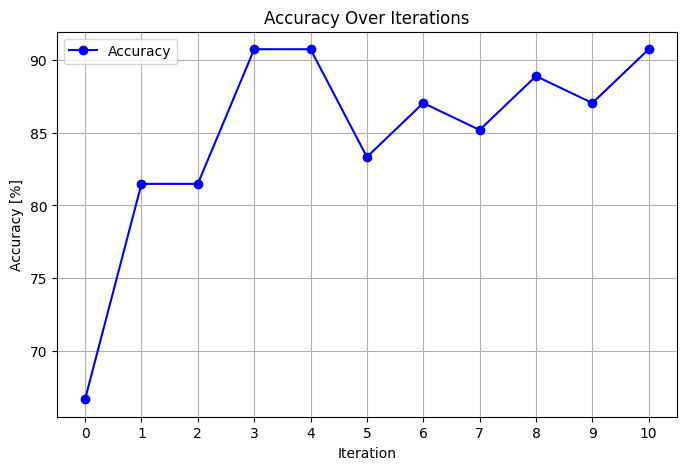

In [7]:
import matplotlib.pyplot as plt

# Assuming results is a dictionary containing 'accuracies' as a list
accuracies = results['accuracies']
iterations = list(range(len(accuracies)))  # Generate integer values for x-axis

# Plot
plt.figure(figsize=(8, 5))  # Set figure size
plt.plot(iterations, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')

# Labels and Title
plt.xlabel("Iteration")
plt.ylabel("Accuracy [%]")
plt.title("Accuracy Over Iterations")
plt.xticks(iterations)  # Ensure only integer ticks are shown
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [8]:
from IPython.display import HTML

# Print last iteration accuracy
display(Markdown(f"### Accurancy: {accuracy}"))

# Print last iteration results
result_dataframe = result_dataframe.map(lambda x: x.replace("\n", "<br>") if isinstance(x, str) else x)
display(HTML(result_dataframe.to_html(escape=False)))

### Accurancy: 90.74

,Request,Context,Expected Function,Expected Inputs,Actual Function,Actual Inputs,Is Correct,Transcripts
0,Get the status of the N2 interface between AMF and NGAP,I want to get the status of the N2 interface between AMF and NGAP,get_amf_ngap_status,{'nf': 'amf'},get_amf_ngap_status,{'nf': 'amf'},True,"* User: Get the status of the N2 interface between AMF and NGAP* Assistant: Please provide the network function name (in lower-case) from which you want to retrieve the AMF-NGAP status (e.g., 'amf').* User: The network function name is ""amf.""* Assistant: * Tool: { ""connected_at"": ""2025-02-11T18:25:21Z"", ""id"": 80, ""plmn"": ""00101"", ""tac"": 1, ""address"": ""10.132.0.10"", ""ran_node_name"": ""UERANSIM-gnb-1-1-4""}* Assistant: The status of the N2 interface between AMF and NGAP is as follows:- **Connected At:** 2025-02-11T18:25:21Z- **ID:** 80- **PLMN:** 00101- **TAC:** 1- **Address:** 10.132.0.10- **RAN Node Name:** UERANSIM-gnb-1-1-4Is there anything more I can assist you with regarding managing the HPE 5G Core?* User: No, that will be all. Thank you for your assistance!* Assistant: * Tool: Close case for udr"
1,What is the status of the interface between AMF and NGAP?,I need to check the status of the interface between AMF and NGAP,get_amf_ngap_status,{'nf': 'amf'},get_amf_ngap_status,{'nf': 'amf'},True,"* User: What is the status of the interface between AMF and NGAP?* Assistant: Please provide the network function name (in lower-case) from which you want to retrieve the AMF-NGAP status (e.g., 'amf').* User: The network function name is ""amf.""* Assistant: * Tool: { ""connected_at"": ""2025-02-11T18:25:21Z"", ""id"": 80, ""plmn"": ""00101"", ""tac"": 1, ""address"": ""10.132.0.10"", ""ran_node_name"": ""UERANSIM-gnb-1-1-4""}* Assistant: The status of the interface between AMF and NGAP is as follows:- **Connected At:** 2025-02-11T18:25:21Z- **ID:** 80- **PLMN:** 00101- **TAC:** 1- **Address:** 10.132.0.10- **RAN Node Name:** UERANSIM-gnb-1-1-4Is there anything more I can assist you with regarding managing the HPE 5G Core?* User: No, that will be all. Thank you for your assistance!* Assistant: * Tool: Close case for udr"
2,Check the interface status between AMF and NGAP,I want to verify the status of the interface between AMF and NGAP,get_amf_ngap_status,{'nf': 'amf'},get_amf_ngap_status,{'nf': 'amf'},True,"* User: Check the interface status between AMF and NGAP* Assistant: Please provide the network function name (in lower-case) from which you want to retrieve the AMF-NGAP status (e.g., 'amf').* User: The network function name is ""amf.""* Assistant: * Tool: { ""connected_at"": ""2025-02-11T18:25:21Z"", ""id"": 80, ""plmn"": ""00101"", ""tac"": 1, ""address"": ""10.132.0.10"", ""ran_node_name"": ""UERANSIM-gnb-1-1-4""}* Assistant: The AMF-NGAP status is as follows:- **Connected At:** 2025-02-11T18:25:21Z- **ID:** 80- **PLMN:** 00101- **TAC:** 1- **Address:** 10.132.0.10- **RAN Node Name:** UERANSIM-gnb-1-1-4Is there anything more I can assist you with regarding managing the HPE 5G Core?* User: No, that will be all. Thank you for your assistance!* Assistant: * Tool: Close case for udr"
3,Retrieve the status of the N2 interface between AMF and NGAP,I need to confirm the current status of the N2 interface between AMF and NGAP,get_amf_ngap_status,{'nf': 'amf'},get_amf_ngap_status,{'nf': 'amf'},True,"* User: Retrieve the status of the N2 interface between AMF and NGAP* Assistant: Please provide the network function name (in lower-case) from which you want to retrieve the AMF-NGAP status (e.g., 'amf').* User: The network function name is ""amf.""* Assistant: * Tool: { ""connected_at"": ""2025-02-11T18:25:21Z"", ""id"": 80, ""plmn"": ""00101"", ""tac"": 1, ""address"": ""10.132.0.10"", ""ran_node_name"": ""UERANSIM-gnb-1-1-4""}* Assistant: The status of the N2 interface between AMF and NGAP is as follows:- **Connected At:** 2025-02-11T18:25:21Z- **ID:** 80- **PLMN:** 00101- **TAC:** 1- **Address:** 10.132.0.10- **RAN Node N